Привет! <br>
Меня зовут Сергей Дроздов, и я буду проверять твой проект. Предлагаю общаться на «ты». Если тебе удобнее общаться на "Вы", просто дай знать. 

Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Так будут выделены комментарии с указаниями, обязательными к выполнению. Без их выполнения проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Так будут выделены некритичные замечания. Их отработка позволит улучшить качество твоего проекта.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Так будут выделены остальные комментарии, полезные лайфхаки и ссылки на сторонние ресурсы </div>

Для наиболее эффективной и оперативной работы над проектом, мне хотелось бы иметь обратную связь. Не стесняйся задавать вопросы. Если ты что-либо меняешь в проекте, пожалуйста, комментируй это. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

# Прогнозирование оттока клиентов. Оператор связи «Ниединогоразрыва.ком»

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## Цель исследования
- провести исследовательский анализ данных
- обучить модель, которая будет прогнозировать отток клиентов оператора связи.
- составить отчет по проделанной работе

## Задача
- провести исследовательский анализ данных
- написать вывод
- написать вопросы
- написать план выполнения работы

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Добавь, пожалуйста, название проекта и цель исследования </div>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt


In [2]:
def check_uniques(data):
    for i in data.columns:
        print(i)
        print(data[i].unique())
        print('---')

In [3]:
try:
    df_contract = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/contract.csv', parse_dates=['BeginDate'])
    df_internet = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/internet.csv')
    df_personal = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/personal.csv')
    df_phone = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/phone.csv')
except:
    
    df_contract = pd.read_csv(
        '/datasets/final_provider/contract.csv', parse_dates=['BeginDate'])
    df_internet = pd.read_csv(
        '/datasets/final_provider/internet.csv')
    df_personal = pd.read_csv(
        '/datasets/final_provider/personal.csv')
    df_phone = pd.read_csv(
        '/datasets/final_provider/phone.csv')


<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Отлично, данные на базе! </div>

# анализ df_contract

In [4]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


в данной таблице имеется 2 временных признака, 3 категориальных признака, и 2 непрерывных.

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо! </div>

In [6]:
check_uniques(df_contract)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
BeginDate
['2020-01-01T00:00:00.000000000' '2017-04-01T00:00:00.000000000'
 '2019-10-01T00:00:00.000000000' '2016-05-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000'
 '2018-04-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2017-07-01T00:00:00.000000000' '2014-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2015-04-01T00:00:00.000000000' '2015-09-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2014-05-01T00:00:00.000000000'
 '2015-10-01T00:00:00.000000000' '2014-03-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2019-11-01T00:00:00.000000000'
 '2019-02-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2017-08-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000'
 '2014-02-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2019-12-01T00:00:00.000000000' '2017-11-01T

1. столбцы `BeginDate` и `EndDate` являются данными типа datetime, но записаны как object
    - поэтому загрузим df_conrtact изначально с изменением формата `BeginDate`
    - в столбце `EndDate` имеются значения "No", что не позволяет изменить тип данных
        - все зависит от того, как будет выглядеть решение задачи
        - если целевой признак `EndDate` и мы кодируем его в зависимости ушел пользователь или нет ([0,1]), тогда мы будем его кодировать
2. столбец `TotalCharges` имеет тип данных object, но содержит в себе только значения типа float, поэтому переведем его в нужный тип данных

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Ок, у нас стоит задача бинарной классификации(ушел пользователь или нет) </div>

## BeginDate

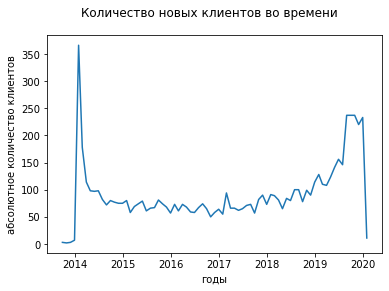

In [7]:
i = df_contract.groupby('BeginDate')['customerID'].count()

fig, ax = plt.subplots()

ax.plot(i.index, i)

fig.suptitle('Количество новых клиентов во времени')
plt.xlabel('годы')
plt.ylabel('абсолютное количество клиентов')
# plt.xticks(i.index)
plt.show()


странные пики в начале и в конце временного промежутка, наверное стоило бы отфильтровать их

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Не стоит, в данном случае аномалий не будет, возможно это были разовые акции. Оставляй как есть </div>

не совсем уверен как лучше сделать, убрать именно эти выпадающие дни или взять промежуток времени, который находится между этими выпадающими значениями?

UPD:в итоге подумал, что стоит все же взять и провести сплит данных, а не фильтр тех выпадающих значений, то есть уменьшить окно временных данных.

непосредственно фильтр выполню это в конце тетради

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- понял, не выполню
</div>

## EndDate

In [8]:
print(f'''
{round(df_contract['EndDate'].where(lambda x: x == 'No').dropna().shape[0] / df_contract['EndDate'].shape[0] * 100)}% пользователей не завершили пользоваться услугами оператора
так как изначально было не много данных ({df_contract.shape[0]}), большой дисбаланс классов возникает, или предполагается что upsampling решит данную проблему достаточно?
''')



73% пользователей не завершили пользоваться услугами оператора
так как изначально было не много данных (7043), большой дисбаланс классов возникает, или предполагается что upsampling решит данную проблему достаточно?



<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Upsempling в данном случае не нужен, так как он не повлияет на roc-auc. Лучше используй весовые коэффициенты при кроссвалидации <a href = "https://alexanderdyakonov.wordpress.com/2021/05/27/imbalance/">Тык</a> </div>

<AxesSubplot:title={'center':'Количество ушедших клиентов во времени'}, xlabel='годы', ylabel='абсолютное количество клиентов'>

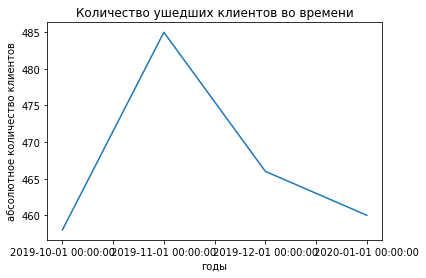

In [9]:
df_contract.query('EndDate != "No"').groupby('EndDate')['customerID'].count().plot(title='Количество ушедших клиентов во времени',
                                                                                   ylabel='абсолютное количество клиентов',
                                                                                   xlabel='годы')


первые ушедшие пользователи появились под конец 2019 года, степень отмены контрактов достигла максимума в октябре 2019 года, после чего видим снижение данного показателя

данный график кажется странным, так как учитывая то, что первые пользователи у данного оператора появились в 2014 году, а впервые пользователи начали уходить спустя почти 6 лет, выглядит сомнительно.

## TotalCharges

In [10]:
df_contract.query('TotalCharges == " "')


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


в целом не понятная система, если они оплатили сразу за два года, то почему у них нет параметра `TotalCharges`?

то есть контракт на два года, но оплата помесячная?
или предполагается, что мы сами посчитаем на 24 месяца?

In [11]:
print(
    f'''
    так как данные клиенты составляют лишь {round(df_contract.query('TotalCharges == " "').shape[0] / df_contract.shape[0] * 100, 2)}% от общего количества пользователей
    {round(df_contract.query('TotalCharges == " " and Type == "Two year"').shape[0] / df_contract.query('Type == "Two year"').shape[0], 2)}% от пользователей, которые подписали контракт сразу на два года
    {round(df_contract.query('TotalCharges == " " and PaperlessBilling == "No"').shape[0] / df_contract.query('PaperlessBilling == "No"').shape[0], 3)}% от пользователей, которые отказались от бумажного счета
    можно их убрать из общего пула данных
    '''
)



    так как данные клиенты составляют лишь 0.16% от общего количества пользователей
    0.01% от пользователей, которые подписали контракт сразу на два года
    0.003% от пользователей, которые отказались от бумажного счета
    можно их убрать из общего пула данных
    


In [12]:
df_contract = df_contract.query('TotalCharges != " "')

In [13]:
# и успешно меняем тип данных в столбце TotalCharges
# и честно сказать, я не понимаю, как такую конструкцию переделать так, чтобы он не ругался, что я записываю на копию
df_contract['TotalCharges'] = df_contract.loc[:,
                                              'TotalCharges'].astype('float')

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b>  Ты можешь заметить, что эти пропуски приходятся на дату выгрузки из бд (это новое подключение). Т.к. таких данных мало, можно их смело удалить или заменить значения на monthlycharges </div>

## Type

In [14]:
df_contract['Type'].value_counts(normalize=True)

Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: Type, dtype: float64

по параметру типа оплаты, клиенты распределены почти равномерно
- между ежемесячной оплатой и долгосрочной: 55% и 45% соответственно
- между долгосрочными, а то есть ежегодной и каждые 2 года: 21% и 24% соответственно

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо! </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь и далее: давай будем кодировать данные после объединения таблиц </div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- понял
</div>

## PaperlessBilling

In [15]:
df_contract['PaperlessBilling'].value_counts(normalize=True)


Yes    0.592719
No     0.407281
Name: PaperlessBilling, dtype: float64

наблюдается сдвиг в сторону бумажного счета

данный параметр можно трансформировать в формат [0,1], для меньшего потребления памяти, что ускорит вычисления

и в целом предполагаю, что необходимо будет произвести label encoding признаков

данный параметр остался с типом object, хотя содержит значения 0 и 1

изменим это

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Все преобразования идут во второй части проекта, на данном этапе идет только анализ и план работы </div>

## PaymentMethod

In [16]:
df_contract['PaymentMethod'].value_counts(normalize=True)


Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: PaymentMethod, dtype: float64

распределение класснов параметра `PaymentMethod`, так же, почти равномерно распределены, с небольшим сдвигом в сторону Electronic check

## MonthlyCharges

In [17]:
df_contract['MonthlyCharges'].describe()


count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>
    
- средняя цена за месяц составляет 65
    - и скорее всего пик у 25 перетянул ее в меньшую сторону от медианы
- медианная цена за месяц составляет 70
- аномалий в данных не наблюдается
    - максимальные и минимальные значения выглядят реалистично.
        - около минимальных и максимальных значений достаточно клиентов с схожими ценами за месяц
</div>

<AxesSubplot:ylabel='Density'>

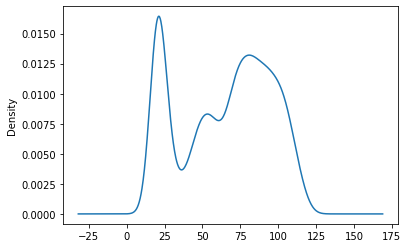

In [18]:
df_contract['MonthlyCharges'].plot(kind='kde')


наибольший пик наблюдается на стоимости 25 за месяц, второй пик на уровне 80 за месяц


<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь и далее: хорошо, давай только добавим еще выводы по описательной статистике, раз ты ее используешь </div>

## TotalCharges

In [19]:
df_contract['TotalCharges'].describe()


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- медиана находится прямо на пике
- когда среднее значение сдвинулось в сторону больших значений, так как видим достаточное количество клиентов с большими общими чеками 
</div>

<AxesSubplot:ylabel='Density'>

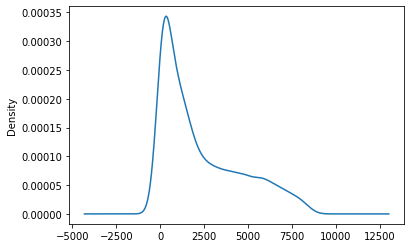

In [20]:
df_contract['TotalCharges'].plot(kind='kde')


основная масса клиентов потратила около 1300

# df_internet

In [21]:
df_internet.head()


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [22]:
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [23]:
df_internet.describe()


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7563-BIUPC,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


интересно, что около половины пользователей в каждой дополнительной услуге пользуется ею.

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Может все таки большая половина не пользуется?)
</div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- большая половина не пользуется, но меньшая, как мне показалось, около половины, пользуется.
- в этом случае мне показалось интересным, что каждая дополнительная услуга пользуется спросом.
    - и нет большого дропа в клинетах
</div>

In [24]:
# у большинства признаков, наибольший класс чуть больше 50%
# значит второй класс находится около половины
df_internet.describe().iloc[3] / df_internet.describe().iloc[0] * 100

customerID           0.018126
InternetService     56.117455
OnlineSecurity      63.404024
OnlineBackup        55.972449
DeviceProtection    56.099329
TechSupport         62.950879
StreamingTV         50.933478
StreamingMovies     50.480334
dtype: object

In [25]:
check_uniques(df_internet)


customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
InternetService
['DSL' 'Fiber optic']
---
OnlineSecurity
['No' 'Yes']
---
OnlineBackup
['Yes' 'No']
---
DeviceProtection
['No' 'Yes']
---
TechSupport
['No' 'Yes']
---
StreamingTV
['No' 'Yes']
---
StreamingMovies
['No' 'Yes']
---


здесь так же можно каждый параметр кодировать OHE 

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Согласен! </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь и далее: при кодирование OHE у тебя тут будет утечка данных. Попробуй использовать OHE из библиотеки sklearn, fit_transform на обучающей выборке, transform на тестовой. Самое лучшее при работе с признаками - использовать пайплайны. </div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- хорошо, понял
</div>

In [26]:
df_internet.shape[0] / df_contract.shape[0] * 100


78.45563139931741

данная таблица содержит данные не для каждого клиента, здесь потеряно 22% клиентов,
что уже неприятная потеря. Возможно из за того, что данные услуги были добавлены в процессе развития компании?

и в теории можем попробовать все NaN заменить 0 и посмотреть какая метрика получится у модели

либо использовать библиотеку, где модель может принять данные с потерянными значениями

# df_personal

In [27]:
df_personal.head()


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [28]:
df_personal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [29]:
df_personal.describe(include='all')


,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,2616-FLVQC,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [30]:
check_uniques(df_personal)


customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
gender
['Female' 'Male']
---
SeniorCitizen
[0 1]
---
Partner
['Yes' 'No']
---
Dependents
['No' 'Yes']
---


In [31]:
for i in df_personal.columns:
    display(df_personal[i].value_counts(normalize=True))

2616-FLVQC    0.000142
2408-PSJVE    0.000142
7136-RVDTZ    0.000142
7963-SHNDT    0.000142
2332-TODQS    0.000142
                ...   
6869-FGJJC    0.000142
3351-NGXYI    0.000142
2888-ADFAO    0.000142
0562-KBDVM    0.000142
2122-YWVYA    0.000142
Name: customerID, Length: 7043, dtype: float64

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

почти все параметры распределены равномерно

помимо `Dependents` у которого сдвиг в сторону "No"
И `SeniorCitizen` у которого сдив в сторону более молодых клиентов

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- так же не многие имеют иждивенцев, всего 30%
</div>

данные параметры все относятся к категориальным, помимо `customerID`, и их можно закодировать.

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- убираю, так как это выполняется в следующей части проекта
</div>

# df_phone

In [32]:
df_phone.head()


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [33]:
df_phone.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [34]:
640 / 7000 * 100


9.142857142857142

- если в остальных таблицах было около 7000 пользователей, то здесь на 640 меньше (10%)
- услуга MultiLines выходила позже остальных, поэтому не всем предлагалось?
- тут зависит от того, какую библиотеку мы будем использовать для обучения модели, у некоторых есть возможность принять на вход данные с пропусками.

In [35]:
df_phone.describe(include='all')


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,2616-FLVQC,No
freq,1,3390


In [36]:
check_uniques(df_phone)


customerID
['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
 '3186-AJIEK']
---
MultipleLines
['No' 'Yes']
---


имеется только один параметр `MultiLines`
у которого только два значения: No и Yes
так же можем привести к формату [0,1]

данный параметр распределен равномерно

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Почему бы и тут не использовать OHE. Так же в данной части работы это не требуется</div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- решил добавить немного разнообразия
</div>

# Объединение данных в общую структуру

In [37]:
df_all = df_contract.copy()


In [38]:
df_all = df_all.merge(df_internet, on='customerID', how='left')
df_all = df_all.merge(df_personal, on='customerID', how='left')
df_all = df_all.merge(df_phone, on='customerID', how='left')


In [39]:
i = df_all.drop(columns=['customerID', 'BeginDate', 'EndDate'])


<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> У тебя почти 3 тысячи строк исчезли, проверь объединение таблиц </div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- если этот комментарий относительно цифр которые были под заголовком UPD
- то это из за того, что я отфильтровал, как мне показалось, странные пики на графике
- фильтровал я обрезав временной отрезок так, чтобы эти пики не входили в него
- поэтому количество информации значительно изменилось
</div>

In [40]:
df_all.shape[0]

7032

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- вроде потерялось только около 10 клиентов
- которые попали на момент, когда данные экспортировали из системы
</div>

для того, чтобы проверить признаки на наличие проблемы мультиколлинеарности, нам необходимо вычесть VIF (Variance Inflation Factor)

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- так как отключили все OHE, то данный код не сработает, поэтому сразу же отключу
</div>

так как у признака `MonthlyCharges` VIF больше 10, это обозначате, что в данных имеется проблема мультиколлинеарности

мы можем либо удалить данный признак, либо оставить

в случае, если целью нашего построения модели является получения рабочей модели, то мы можем и оставиь ее,
если же мы хотим после успешного обучения модели посмотреть какие параметры она связала (интерпретация модели), то нам необходимо удалить данный параметр

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Молодец, что знаешь про VIF! Так же можно посмотреть ковариационную матрицу. </div>

# Выводы
- все таблицы были просмотрены
- основные проблемы:
    - не соответствие типа данных
    - временные данные вызывают сомнения
        - данные время оформления контракта имеют два сильных пика
        - данные отмены контракта содержат данные только за конец 2019 года
    - имеется проблема мультиколлинеарности
    - потеря данных в двух таблицах:
        - df_internet -- 22% по отношению к df_contract
        - df_phone -- 9.1% по отношению к df_contract
- проведена кодировка данных

# UPD

фильтр данных

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Как я писал выше, аномали в данных нет, поэтому фильтровать ничего не надо </div>

проверим как данный фильтр повлиял на распределение классов

данный фильтр не сильно изменил распределение классов в признаках, как и на VIF

# Вопросы

- предполагается, что мы приводим столбец EndDate к формату [0,1]?
    - в данном случае предполагается задача классификации?
- предполагается, что мы будем использовать `Binary Cross-Entropy Loss` как фунцию потерь?
- какие ресурсы есть у компании, чтобы обучить и поддерживать модель?
    - для того, чтобы выбрать тип модели для обучения
- если имеет значение:
    - дополнительные услуги входят в стоимость указанную в признаке `MonthlyCharges`? или мы должны это дополнительно рассчитывать
    - что обозначает признак `MultipleLines`

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> 1. У нас задача бинарной классификации
<br>2. Главной метрикой у нас будет roc-auc
<br>3. Лучше всегда начинать с простых моделей
<br>4. Подготовка признаков на твое усмотрение, обозначения признаков я привел в слаке</div>

# План выполнения задачи

1. Уточнение задачи
    - базовая метрика
    - в каком формате необходим итог
    - как будет производиться оценка модели
2. Предобработка данных
    - ~~нахождение и устранение аномалий данных~~
    - кодирование признаков
    - обработка VIF
    - возможно нормализация данных
3. Обучение модели
    - выбор библиотеки для выполнения поставленной задачи
    - формирование датасетов
    - Модель 1:
        - тестовое обучение
        - настройка гиперпараметров
    - Модель 2 (бустинговая):
        - тестовое обучение
        - настройка гиперпараметров
4. Проверка модели на тестовых данных
    - сравнение результатов с целевыми
    - при необходимости повторить предыдущий пункт
5. Сдача задания
    - отправление кода
    - оценка работы

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Подправь, пожалуйста, план. По заданию нужно будет сделать минимум 2 модели, включая бустинговую модель. Так же аномалий в данном случае нет</div>

<b>Итоговый комментарий ревьюера:
&#9989;</b> Отлично, критические замечания учтены. Теперь можно переходить к выполнению второй части работы. Удачи!